In [1]:
from scipy.stats import uniform, norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Ruido y residuos
Consideremos la función 𝑓 : R → R dada por 𝑓 (𝑥) = 2𝑥 − 1.

a) Sean 𝑋 ∼ U (0,1) y 𝑌 := 𝑓(𝑋).

Fijemos 𝑛 = 100. 
Tomar muestras 𝑥1, . . . , 𝑥𝑛 de 𝑋 y aplicar la función 𝑓 a cada muestra para calcular 𝑦𝑖 = 𝑓(𝑥𝑖), con 1 ≤ 𝑖 ≤ 𝑛. 
Realizar un ajuste lineal de la forma 𝑌 = 𝛽0 + 𝑋𝛽1 + 𝜖 a partir de los samples (𝑥1, 𝑦1), ... , (𝑥𝑛, 𝑦𝑛) generados 
y calcular, para cada 𝑖 ∈ {1, . . . , 𝑛}, 𝜀𝑖 = 𝑦𝑖 − (𝑥𝑖ˆ𝛽1 + ˆ𝛽0).

Describir la distribución empírica dada por los residuos {𝜀1, . . . , 𝜀𝑛}

In [ ]:
# Crear estimadores del Modelo de Regresión Lineal Simple
def simple_linear_regression(x, y):
    """
    Estima un modelo de regresión lineal simple (MRLS) utilizando mínimos cuadrados ordinarios.

    Parámetros:
    - x: array de valores independientes.
    - y: array de valores dependientes.

    Devuelve:
    - beta_0: intercepto estimado.
    - beta_1: pendiente estimada.
    """
    # Calcular las medias de x e y
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # Calcular el numerador y denominador para beta_1 (pendiente)
    numerador = np.sum((x - x_mean) * (y - y_mean))
    denominador = np.sum((x - x_mean)**2)

    # Estimación de beta_1 (pendiente)
    beta_1 = numerador / denominador

    # Estimación de beta_0 (intercepto)
    beta_0 = y_mean - beta_1 * x_mean

    return beta_0, beta_1

In [16]:
# Fijar parámetros
n = 100

# Generar muestras x ~ U(0,1)
x = np.random.uniform(0, 1, n)

# Aplicar f(x) = 2x - 1
y = 2 * x - 1   # b_1 = 2, b_0 = -1

# Ajuste de regresión lineal (y = beta0 + beta1 * x)
X = np.stack((np.ones(n),x)).T
#print('X:',X)

beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y # (X'X)^(-1) X'y
print('betahat:',beta_hat)

# Predicciones - y_hat = b_0 + b_1 * x
y_hat = X @ beta_hat
print('y_hat:',y_hat)

# Cálculo de residuos
residuos = y - y_hat

'''
# Generar Variables Aleatorias
X = uniform.rvs(size=n)
epsilon = norm.rvs(loc=0, scale=sigma, size=n)

Y = f(X) + epsilon

# Estimar el MRLS
beta_0, beta_1 = simple_linear_regression(X, Y)

# Imprimir los estimadores
print("Estimador de beta_0:", beta_0)
print("Estimador de beta_1:", beta_1)
'''



betahat: [-1.  2.]
y_hat: [ 0.21822794 -0.49782812 -0.2919813   0.38507768  0.76754922  0.98612605
  0.36228659  0.97720031 -0.49394993 -0.48901071 -0.53308241 -0.16404179
 -0.42539874 -0.94953168 -0.29289949 -0.44994898 -0.9090739  -0.94051234
  0.00410512  0.27959315  0.59051015 -0.5508502  -0.45937803  0.32486931
 -0.17392918  0.78871429  0.28914191  0.04372782  0.0888688   0.77623642
 -0.73973958  0.62656878 -0.93708076  0.48137208  0.01225786 -0.94134544
 -0.82663708  0.06370862 -0.92906089 -0.09971521 -0.06061818 -0.38162008
 -0.13163224  0.93657448 -0.17963839 -0.92953571  0.43795705 -0.70091691
  0.20931148 -0.20310668 -0.96439212 -0.97676318 -0.0104753   0.59496003
  0.64629529  0.59306224  0.27085636  0.24533146  0.93445478  0.18374285
 -0.49458907 -0.92674894 -0.29853578  0.86411719 -0.71941003 -0.71831593
  0.5985126   0.31216948  0.65160034 -0.10033248 -0.83688264 -0.95251618
  0.2104998   0.21933174 -0.35947491 -0.04361794 -0.18533978  0.30451944
  0.60311714  0.76420563 

'\n# Generar Variables Aleatorias\nX = uniform.rvs(size=n)\nepsilon = norm.rvs(loc=0, scale=sigma, size=n)\n\nY = f(X) + epsilon\n\n# Estimar el MRLS\nbeta_0, beta_1 = simple_linear_regression(X, Y)\n\n# Imprimir los estimadores\nprint("Estimador de beta_0:", beta_0)\nprint("Estimador de beta_1:", beta_1)\n'

In [22]:
# ordenar los residuos
residuos_ordenados = np.sort(residuos)
residuos_ordenados
#residuos = residuos.reshape(-1,1)
#residuos

array([-1.11022302e-15, -1.11022302e-15, -1.11022302e-15, -1.11022302e-15,
       -8.88178420e-16, -8.88178420e-16, -8.88178420e-16, -6.66133815e-16,
       -6.66133815e-16, -6.66133815e-16, -6.66133815e-16, -6.66133815e-16,
       -6.66133815e-16, -4.44089210e-16, -4.44089210e-16, -4.44089210e-16,
       -4.44089210e-16, -4.44089210e-16, -4.44089210e-16, -4.44089210e-16,
       -4.44089210e-16, -4.44089210e-16, -4.44089210e-16, -4.44089210e-16,
       -2.22044605e-16, -2.22044605e-16, -2.22044605e-16, -2.22044605e-16,
       -2.22044605e-16,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.22044605e-16,  2.22044605e-16,  2.22044605e-16,  2.22044605e-16,
        2.22044605e-16,  4.44089210e-16,  4.44089210e-16,  4.44089210e-16,
        4.44089210e-16,  4.44089210e-16,  4.44089210e-16,  4.44089210e-16,
        5.55111512e-16,  

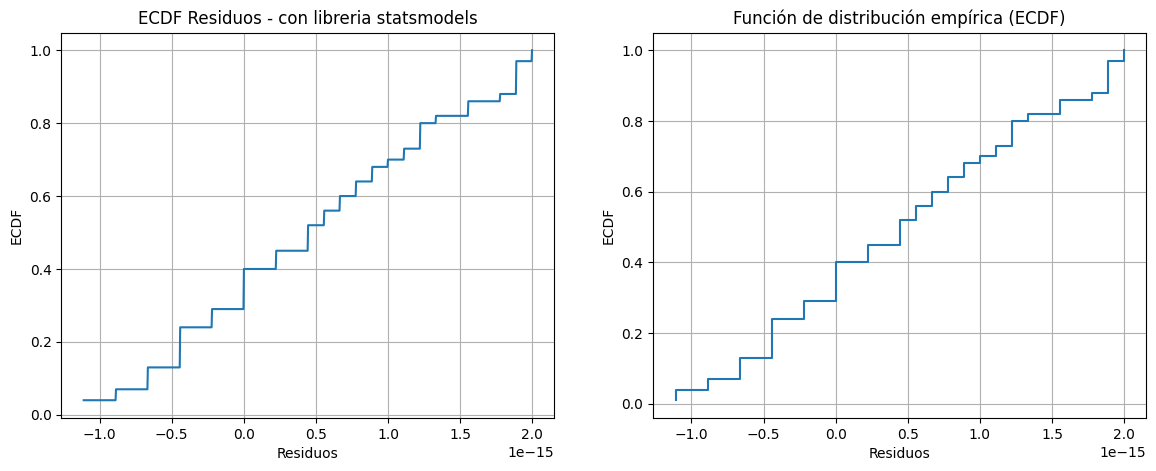

In [24]:
from statsmodels.distributions.empirical_distribution import ECDF

# Armar el eje de probabilidades
ecdf = np.arange(1, len(residuos)+1) / len(residuos)
ecdf_a = ECDF(residuos)
# Graficar
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

x_plot_a = np.linspace(min(residuos), max(residuos), 1000)
ax[0].plot(x_plot_a, ecdf_a(x_plot_a))
ax[0].set_title("ECDF Residuos - con libreria statsmodels")
ax[0].set_xlabel("Residuos")
ax[0].set_ylabel("ECDF")
ax[0].grid(True)


ax[1].step(residuos_ordenados, ecdf, where='post')
ax[1].set_title("Función de distribución empírica (ECDF)")
ax[1].set_xlabel("Residuos")
ax[1].set_ylabel("ECDF")
ax[1].grid(True)

b) Sean𝑋 ∼ U (0, 1), 𝑍 ∼ N (0, .25) y 𝑌 := 𝑓 (𝑋)+𝑍. Fijemos 𝑛 = 100. Tomar muestras 𝑥1, . . . , 𝑥𝑛
    de 𝑋 y 𝑧1, . . . , 𝑧𝑛 de 𝑍 y calcular 𝑦𝑖 = 𝑓 (𝑥𝑖) + 𝑧𝑖, con 1 ≤ 𝑖 ≤ 𝑛. Realizar un ajuste lineal de
    la forma 𝑌 = 𝑋 𝛽1 + 𝛽0 + 𝜖 a partir de los samples (𝑥1, 𝑦1), . . . , (𝑥𝑛, 𝑦𝑛) generados y calcular,
    para cada 𝑖 ∈ {1, . . . , 𝑛},
    𝜀𝑖 = 𝑦𝑖 − (𝑥𝑖𝛽1 + 𝛽0).
Describir la distribución empírica dada por {𝜀1, . . . , 𝜀𝑛} haciendo un histograma

In [ ]:
n = 100
x = np.random.uniform(0, 1, n)
z = np.random.normal(0, 0.25, n)

y = 2 * x - 1 + z

# Ajuste de regresión lineal (y = beta0 + beta1 * x)
X = np.stack((np.ones(n),x)).T

beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y # (X'X)^(-1) X'y
print('betahat:',beta_hat)

y_hat = X @ beta_hat

residuos = y - y_hat
#residuos_ordenados = np.sort(residuos)


betahat: [-0.99214893  1.98754188]


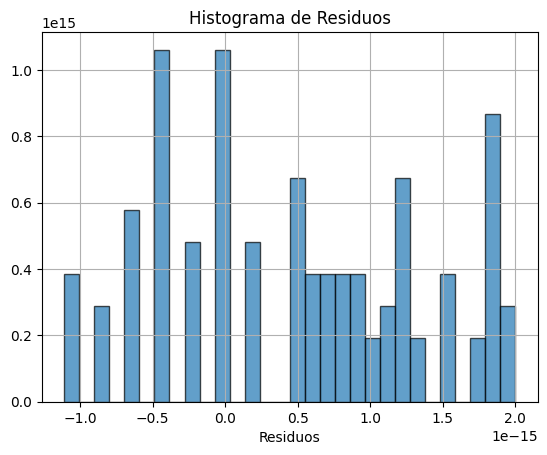

In [37]:

plt.hist(residuos, bins=30, density=True, edgecolor='black', alpha=0.7, label='Residuos')
plt.title('Histograma de Residuos')
plt.xlabel('Residuos')
plt.grid(True)
plt.show()

c) Repetir el paso anterior desde 𝑛 = 10 hasta 𝑛 = 1000. Graficar y estimar la media y la varianza de 𝜀 en función de 𝑛.

In [ ]:
ns = range(10, 1_000)
medias_residuos = []
varianzas_residuos = []

for n in ns:
    x = np.random.uniform(0, 1, n)
    z = np.random.normal(0, 0.25, n)

    y = 2 * x - 1 + z

    # Ajuste de regresión lineal (y = beta0 + beta1 * x)
    X = np.stack((np.ones(n),x)).T

    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y # (X'X)^(-1) X'y
    print('betahat:',beta_hat)

    y_hat = X @ beta_hat

    residuos = y - y_hat
    
    media = np.mean(residuos)
    varianza = np.var(residuos, ddof=1)  # Importante ddof=1 para varianza muestral

    # Guardar
    medias_residuos.append(media)
    varianzas_residuos.append(varianza)
    

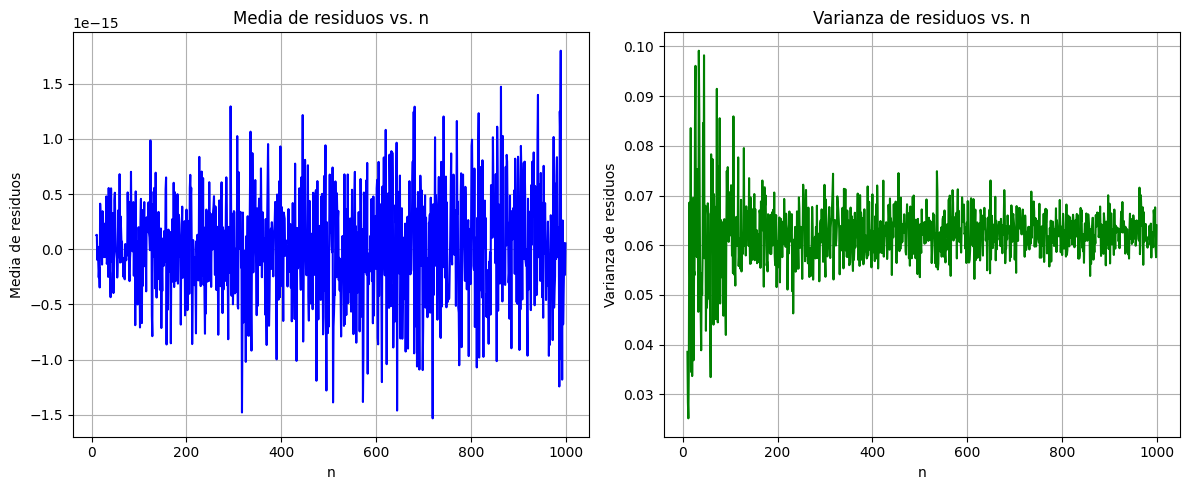

In [39]:
# --- Graficar media de residuos en función de n ---
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(ns, medias_residuos, color='blue')
plt.xlabel('n')
plt.ylabel('Media de residuos')
plt.title('Media de residuos vs. n')
plt.grid(True)

# --- Graficar varianza de residuos en función de n ---
plt.subplot(1,2,2)
plt.plot(ns, varianzas_residuos, color='green')
plt.xlabel('n')
plt.ylabel('Varianza de residuos')
plt.title('Varianza de residuos vs. n')
plt.grid(True)

plt.tight_layout()
plt.show()